In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from collections import defaultdict 
import datetime
from datetime import timedelta
from sklearn.ensemble import RandomForestRegressor

In [2]:
instance_based_dataset = pd.read_csv(r'C:\Users\Pablo\Desktop\Pablo\master_ai\data_mining\Mood Predictor 5 copy 3\Mood Predictor\data\new\instance_based_dataframe_5_days_window.csv')
instance_based_dataset

,Unnamed: 0,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,other_use,daily_use,recreational_use,professional_use,target_mood,id,days_range
0,7,6.285714,-0.142857,0.571429,0.000000,0.000000,8.0,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.250000,AS14.01,2014-02-24
1,8,6.285714,-0.142857,0.571429,0.000000,0.000000,8.0,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.333333,AS14.01,2014-02-25
2,30,6.466667,0.333333,0.685326,0.163883,686.532368,11.0,1.0,173.003042,273.250637,87.784254,292.048531,311.338614,66.866953,6.200000,AS14.01,2014-03-19
3,31,6.350000,0.450000,0.685326,0.138406,684.744535,20.0,1.0,172.421646,321.516365,87.349800,295.484402,444.385236,60.451662,6.400000,AS14.01,2014-03-20
4,32,6.416667,0.458333,0.685326,0.130102,1174.228167,19.0,2.0,172.516316,502.932910,104.133940,295.456087,443.975715,60.664907,6.800000,AS14.01,2014-03-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,1983,6.083333,-0.375000,0.685326,0.015758,1981.972886,2.0,1.0,117.825328,288.602229,17.925151,3.612714,1138.318494,0.000000,6.200000,AS14.33,2014-05-17
954,1984,6.041667,-0.333333,0.685326,0.014787,1971.242890,6.0,0.0,117.758618,288.709432,19.139086,4.063308,1138.655746,0.000000,6.250000,AS14.33,2014-05-18
955,1985,6.000000,-0.400000,0.685326,0.015295,871.463771,7.0,1.0,73.478122,284.802731,19.829092,4.419000,1239.040706,0.000000,6.000000,AS14.33,2014-05-19
956,1986,6.040000,-0.089025,0.685326,0.016397,869.169374,7.0,1.0,106.966400,284.420207,21.461974,4.419000,1234.605765,0.000000,5.750000,AS14.33,2014-05-20


In [3]:
m = len(instance_based_dataset)
train=int(0.8*m)

X = instance_based_dataset.drop(['Unnamed: 0','target_mood','id','days_range'], axis = 1)

y = instance_based_dataset['target_mood']
    
X_train = X.drop(list(instance_based_dataset.index)[train:], axis = 0)
X_test = X.drop(list(instance_based_dataset.index)[:train], axis = 0)
y_train = y.drop(list(instance_based_dataset.index)[train:], axis = 0)
y_test = y.drop(list(instance_based_dataset.index)[:train], axis = 0)


In [10]:
rf = RandomForestRegressor(n_estimators = 222, min_samples_split = 10, min_samples_leaf = 4, max_features = 'auto', max_depth = 30, bootstrap = True)

rf.fit(X_train, y_train)

prediction_rf = rf.predict(X_test)


In [11]:
errors = abs(prediction_rf - y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.34 degrees.
Accuracy: 95.26 %.


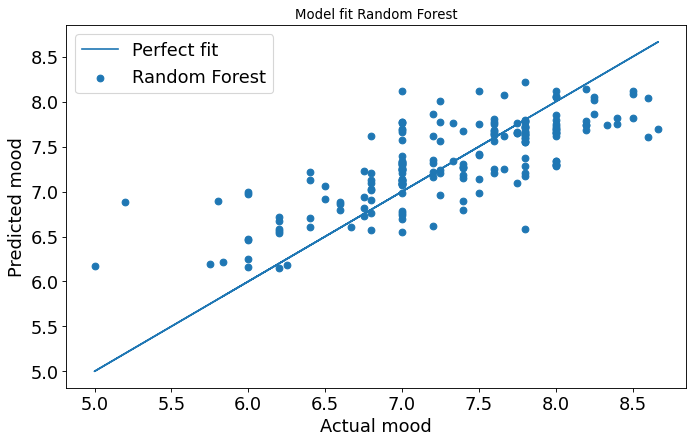

In [82]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)

plt.plot(y_test,y_test, label = 'Perfect fit')
plt.scatter(y_test,prediction_rf, label = 'Random Forest')

plt.xlabel("Actual mood",fontsize = 16)
plt.ylabel("Predicted mood",fontsize = 16)
plt.title("Model fit Random Forest")
plt.legend(loc="upper left",prop={'size': 16})
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.savefig(r'C:\Users\Pablo\Desktop\Pablo\master_ai\data_mining\figures\model fit RF.png')
plt.show()


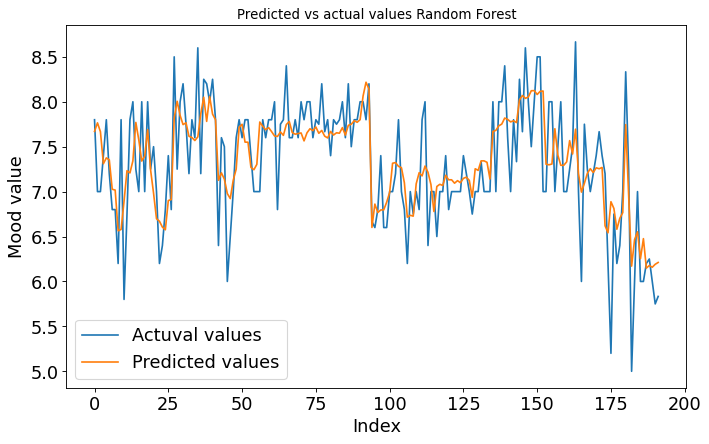

In [70]:
figure(figsize=(10, 6), dpi=80)
plt.plot(range(len(list(y_test))),list(y_test), label = 'Actuval values')
plt.plot(range(len(list(y_test))),list(prediction_rf), label = 'Predicted values')
plt.xlabel("Index", fontsize = 16)
plt.ylabel("Mood value", fontsize = 16)
plt.legend(loc="lower left",prop={'size': 16})
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.title("Predicted vs actual values Random Forest")
plt.savefig(r'C:\Users\Pablo\Desktop\Pablo\master_ai\data_mining\figures\predicted vs actual rf.png')
plt.show()

In [17]:

# Get numerical feature importances
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X.columns, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: mood                 Importance: 0.64
Variable: circumplex.arousal   Importance: 0.04
Variable: circumplex.valence   Importance: 0.04
Variable: activity             Importance: 0.04
Variable: appCat.communication Importance: 0.04
Variable: screen               Importance: 0.03
Variable: appCat.builtin       Importance: 0.03
Variable: other_use            Importance: 0.03
Variable: daily_use            Importance: 0.03
Variable: recreational_use     Importance: 0.03
Variable: call                 Importance: 0.02
Variable: sms                  Importance: 0.02
Variable: professional_use     Importance: 0.01


In [107]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, prediction_rf)
print(MSE)
print (np.sqrt(MSE)/np.mean(y_test))


0.19091000399446503
0.05974861505484095


In [8]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 30, stop = 300, num = 50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 300, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=300,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [30, 35, 41, 46, 52, 57,
                                                         63, 68, 74, 79, 85, 90,
                                                         96, 101, 107, 112, 118,
                                                         123, 129, 134, 140,
                                                         145, 151, 156, 162,


In [9]:
rf_random.best_params_

{'n_estimators': 222,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [21]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train,y_train)

prediction_lm =  LR.predict(X_test)

LinearRegression()

In [118]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, prediction_lm)
print(MSE)
print (np.sqrt(MSE)/np.mean(y_test))

0.18514415077508098
0.058839435519292514


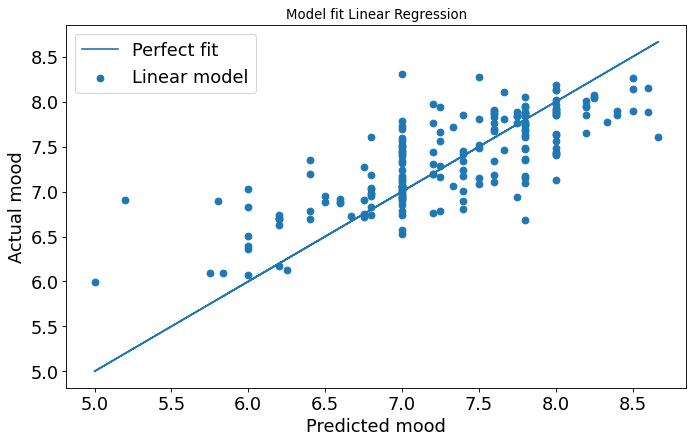

In [72]:
figure(figsize=(10, 6), dpi=80)

plt.plot(y_test,y_test, label = 'Perfect fit')
plt.scatter(y_test,prediction_lm, label = 'Linear model')

plt.title("Model fit Linear Regression")
plt.xlabel("Predicted mood", fontsize = 16)
plt.ylabel("Actual mood",fontsize = 16)
plt.legend(loc="upper left",prop={'size': 16})
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.savefig(r'C:\Users\Pablo\Desktop\Pablo\master_ai\data_mining\figures\model fit LM.png')
plt.show()

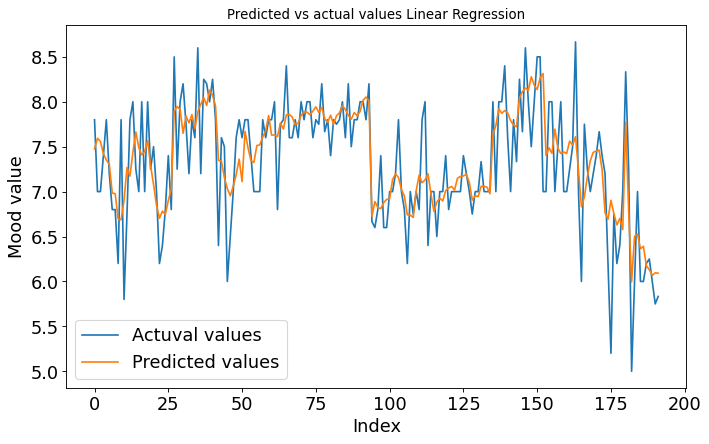

In [73]:
figure(figsize=(10, 6), dpi=80)
plt.plot(range(len(list(y_test))),list(y_test), label = 'Actuval values')
plt.plot(range(len(list(y_test))),list(prediction_lm), label = 'Predicted values')
plt.xlabel("Index",fontsize = 16)
plt.ylabel("Mood value",fontsize = 16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.legend(loc="lower left",prop={'size': 16})
plt.title("Predicted vs actual values Linear Regression")
plt.savefig(r'C:\Users\Pablo\Desktop\Pablo\master_ai\data_mining\figures\predicted vs actual lm.png')
plt.show()

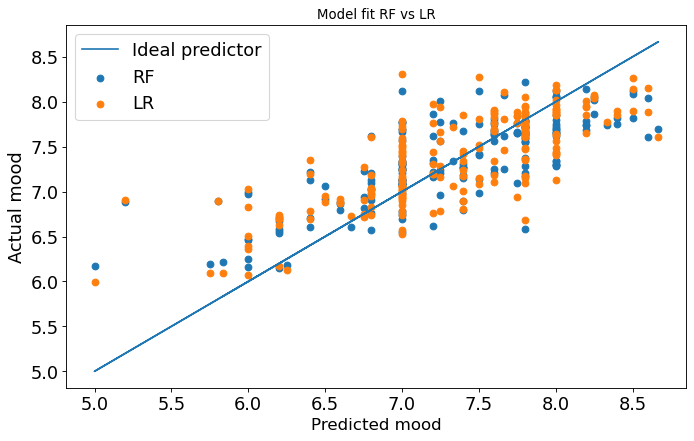

In [74]:
from matplotlib.pyplot import figure
#fig, axs = plt.subplots(3, 1)
figure(figsize=(10, 6), dpi=80)

plt.plot(y_test,y_test, label = 'Ideal predictor')
plt.scatter(y_test,prediction_rf, label = 'RF')
plt.scatter(y_test,prediction_lm, label = 'LR')

plt.title("Model fit RF vs LR")
plt.xlabel("Predicted mood",fontsize = 15)
plt.ylabel("Actual mood",fontsize = 16)
plt.legend(loc="upper left",prop={'size': 16})
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.savefig(r'C:\Users\Pablo\Desktop\Pablo\master_ai\data_mining\figures\model fit LM and RF.png')
plt.show()

In [28]:
avg_pred = (prediction_rf + prediction_lm)/2

In [104]:
MSE = mean_squared_error(y_test, avg_pred)
print(MSE)
print (np.sqrt(MSE)/np.mean(y_test))

0.18299897357905573
0.0584975701023758


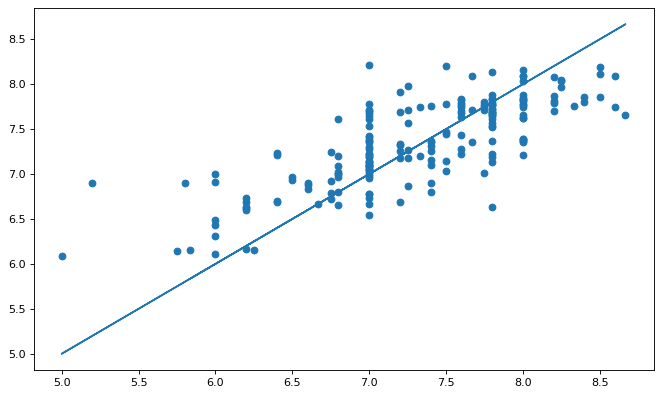

In [33]:
figure(figsize=(10, 6), dpi=80)
#plt.scatter(range(len(list(y_test))),list(np.sqrt((y_test-y_hat_test)**2)))
plt.plot(y_test,y_test)
plt.scatter(y_test,avg_pred)
plt.show()

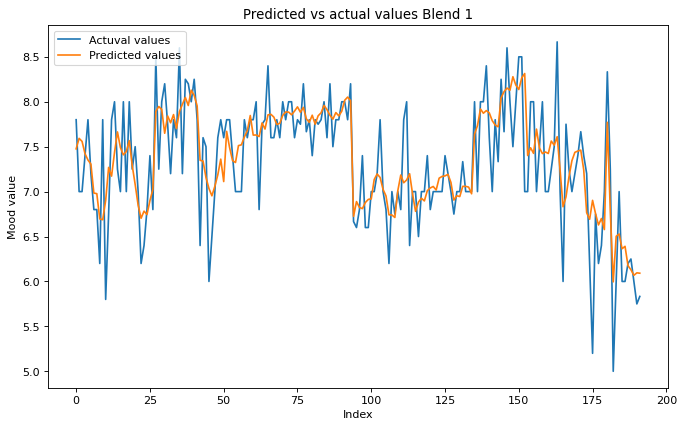

In [34]:
figure(figsize=(10, 6), dpi=80)
plt.plot(range(len(list(y_test))),list(y_test), label = 'Actuval values')
plt.plot(range(len(list(y_test))),list(prediction_lm), label = 'Predicted values')
plt.xlabel("Index")
plt.ylabel("Mood value")
plt.legend(loc="upper left")
plt.title("Predicted vs actual values Blend 1")
plt.savefig(r'C:\Users\Pablo\Desktop\Pablo\master_ai\data_mining\figures\predicted vs actual avg.png')
plt.show()

In [35]:
X1_train = X_train.copy()
X1_test = X_test.copy()

In [36]:
X1_train['Pred'] = rf.predict(X_train)
X1_test['Pred'] = prediction_rf

In [37]:
LR1 = LinearRegression()
# fitting the training data
LR1.fit(X1_train,y_train)

LinearRegression()

In [105]:
pred1 =  LR1.predict(X1_test)
MSE = mean_squared_error(y_test, pred1)
print(MSE)
print (np.sqrt(MSE)/np.mean(y_test))

0.24972854516988896
0.06833569145592981


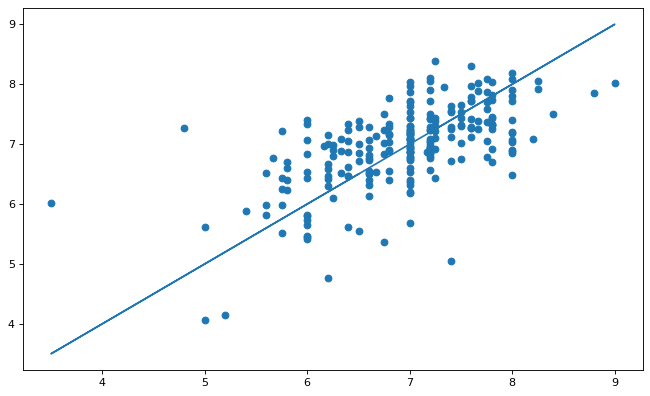

In [30]:
figure(figsize=(10, 6), dpi=80)
plt.plot(y_test,y_test)
plt.scatter(y_test,pred1)
plt.show()


In [91]:
X2_train = X_train.copy()
X2_test = X_test.copy()
X2_train['Pred'] = LR.predict(X_train)
X2_test['Pred'] = prediction_lm

In [115]:
rf2 = RandomForestRegressor()

rf2.fit(X2_train, y_train)

prediction_rf2 = rf2.predict(X2_test)


In [117]:
MSE = mean_squared_error(y_test, prediction_rf2)
print(MSE)
print (np.sqrt(MSE)/np.mean(y_test))

0.19417394111689823
0.06025720348881787


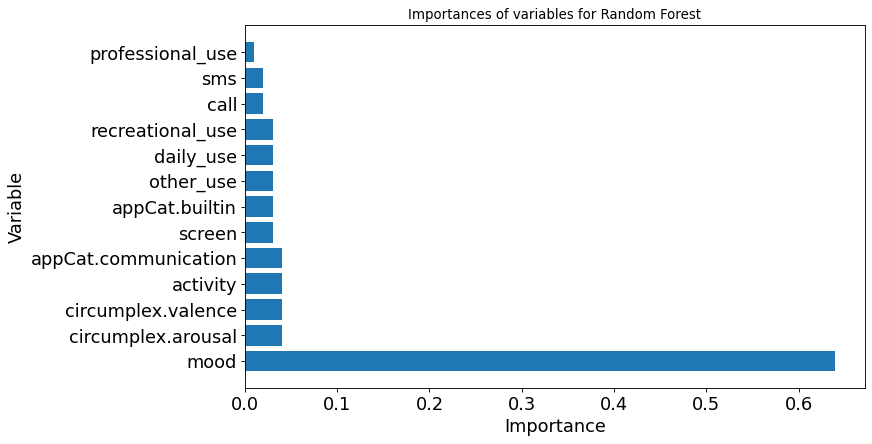

In [79]:
variables = []
imp = []
for var, val in feature_importances:
    variables.append(var)
    imp.append(val)
fig = plt.figure(figsize=(10, 6), dpi=80)
plt.barh(variables,imp)
plt.title('Importances of variables for Random Forest')
plt.xlabel('Importance',fontsize = 16)
plt.ylabel('Variable',fontsize = 16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()
fig.savefig(r'C:\Users\Pablo\Desktop\Pablo\master_ai\data_mining\figures\Importances RF.png')

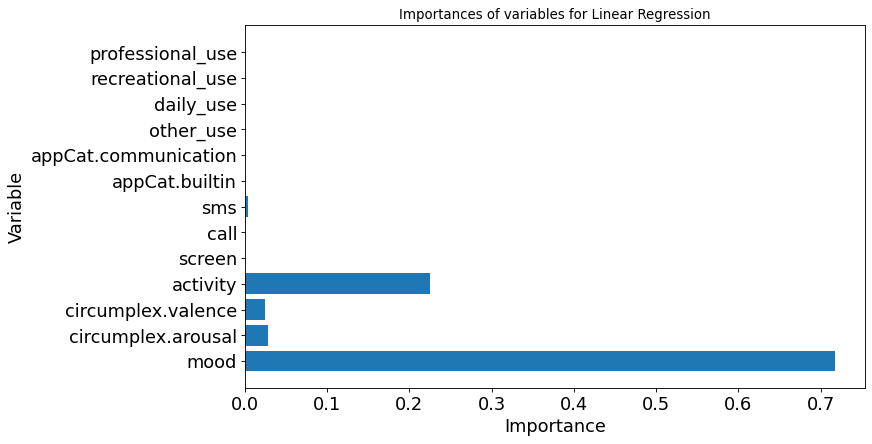

In [80]:
fig = plt.figure(figsize=(10, 6), dpi=80)
plt.barh(X.columns,abs(LR.coef_)/np.sum(abs(LR.coef_)))
plt.title('Importances of variables for Linear Regression')
plt.xlabel('Importance',fontsize = 16)
plt.ylabel('Variable',fontsize = 16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
# If you want to define your own labels,
# change indices to a list of labels on the following line.
#plt.yticks(range(X.shape[1]), indices)
#plt.ylim([-1, X.shape[1]])
plt.show()
fig.savefig(r'C:\Users\Pablo\Desktop\Pablo\master_ai\data_mining\figures\Importances LM.png')

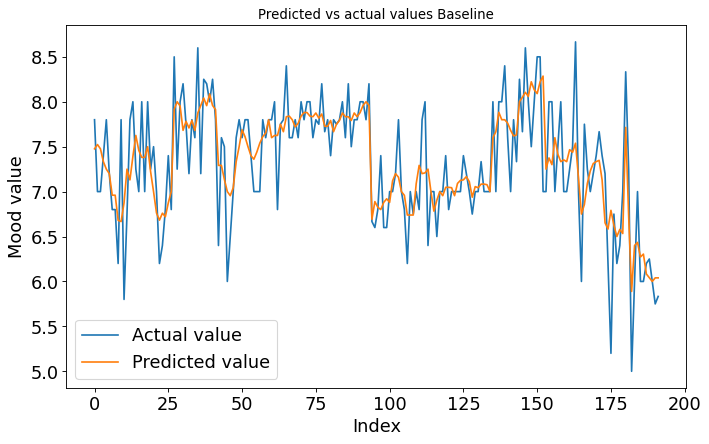

In [99]:
figure(figsize=(10, 6), dpi=80)
plt.plot(range(len(list(y_test))),list(y_test), label ='Actual value')
plt.plot(range(len(list(X_test.mood))),list(X_test.mood), label = 'Predicted value')
plt.xlabel("Index",fontsize = 16)
plt.ylabel("Mood value",fontsize = 16)
plt.legend(loc="lower left",prop={'size': 16})
plt.title("Predicted vs actual values Baseline")
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.savefig(r'C:\Users\Pablo\Desktop\Pablo\master_ai\data_mining\figures\predicted vs actual Baseline.png')
plt.show()
plt.show()

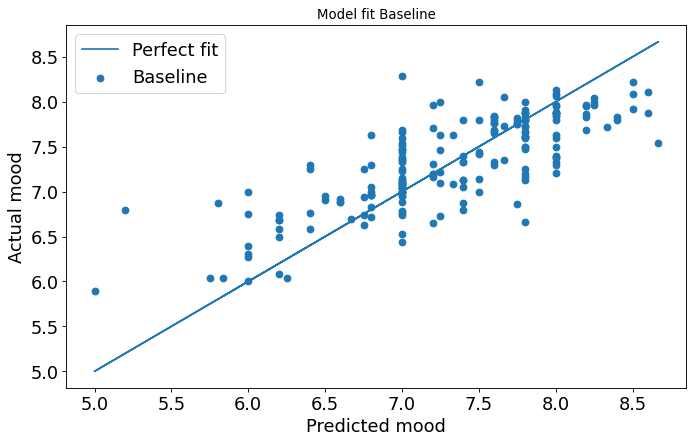

In [98]:
figure(figsize=(10, 6), dpi=80)

plt.plot(y_test,y_test, label = 'Perfect fit')
plt.scatter(y_test,X_test.mood, label = 'Baseline')

plt.title("Model fit Baseline")
plt.xlabel("Predicted mood",fontsize = 16)
plt.ylabel("Actual mood",fontsize = 16)
plt.legend(loc="upper left",prop={'size': 16})
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.savefig(r'C:\Users\Pablo\Desktop\Pablo\master_ai\data_mining\figures\model fit Baseline.png')
plt.show()